<a href="https://colab.research.google.com/github/Dowell-Lab/psea/blob/main/notebook_examples/simulateddata-bothdirs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import numpy.random as random
from datetime import datetime
import random
import plotly.express as px
from concurrent.futures import ProcessPoolExecutor
from functools import reduce
import csv
from pathlib import Path
import os

In [6]:
now = datetime.now()
date_time_string = now.strftime("%Y%m%d%H%M%S")
print(date_time_string)


20251208123224


In [4]:
print(date_time_string)

20251208123215


In [69]:
outdir = "/Shares/down/public/INLCUDE_2024/AREA_paper_2025/output_data/"+"simulated_data_"+str(date_time_string)+"/"

try:
    os.mkdir(outdir)
    print(f"Directory '{outdir}' created successfully.")
except OSError as e:
    print(f"Error creating directory '{outdir}': {e}")

Directory '/Shares/down/public/INLCUDE_2024/AREA_paper_2025/output_data/simulated_data_20251208123224/' created successfully.


# Look at the real data

In [26]:


def load_var_mapping(csv_path, var_col="var", path_col="path"):
    """Read CSV and return a dict {var_name: file_path}."""
    fndf = pd.read_csv(csv_path, names=[var_col, path_col])
    mapping = dict(zip(fndf[var_col], fndf[path_col]))
    return mapping





In [34]:
load_variables_from_file=False

if load_variables_from_file==True:
    # Use a two column CSV to set the variables needed
    csv_path = "/Shares/down/public/INLCUDE_2024/AREA_paper_2025/AREA_publication_scripts/figure_scripts/file_locations.csv"
    var_to_path = load_var_mapping(csv_path)

    # Ask it to "set" specific variable names
    requested = ["HTP_normcounts_patientid", "HTP_Hakonarson_Disease_HP_df", "namelist"]
    fns_and_paths = load_var_mapping(csv_path)
    gene_exp_df = pd.read_csv(fns_and_paths["HTP_normcounts_patientid"].strip(" "), index_col=0)
    comorbid_df = pd.read_csv(fns_and_paths["HTP_Hakonarson_Disease_HP_df"].strip(" "), index_col=0)
    namesdf = pd.read_csv(fns_and_paths["namelist"].strip(" "), index_col=0, names=["name"])

else:
    # this brings in the normalized counts for the Human Trisome Project (HTP)
    gene_exp_fn="/Shares/down/public/INLCUDE_2024/kallisto_20241030/selfannoated/kallisto_200401lines_participants_normcounts.csv"
    gene_exp_df=pd.read_csv(gene_exp_fn, index_col=0)

    #this brings in the medical disorders for all the individuals with Trisomy 21 in the Human Trisome Project
    comorbid_fn = "/Shares/down/public/INLCUDE_2024/kallisto_20241030/selfannoated/full_HP_binary_attribute.csv"
    comorbid_df = pd.read_csv(comorbid_fn, index_col=0)

    #this brings in random names to use
    namefile = "/Shares/down/public/INLCUDE_2024/AREA_paper_2025/AREA/testdata/namelist.txt"
    namesdf = pd.read_csv(namefile, index_col=0, names=["name"])




In [37]:
gene_exp_df



ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
0             29.516858                0.0          677.204855   
1             47.883863                0.0          878.701066   
2             38.107012                0.0          822.215303   
3              7.904249                0.0          488.443725   
4             17.681451                0.0          929.728834   
..                  ...                ...                 ...   
395           17.242527                0.0         1031.678033   
396           41.884893                0.0          963.949006   
397           36.321957                0.0          729.360879   
398           30.222321                0.0          831.888806   
399           17.439145                0.0         1216.911476   

     ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
0            874.335011          150.102000        26338.795021   
1            930.485510          183.874029        15675.943089   
2            899.600053          188.989659        20846.982160   
3            818.246942           73.996124        33611.415617   
4            918.153598          192.989845        24482.400404   
..                  ...                 ...                 ...   
395          883.659222          167.326793        33234.243367   
396          935.839347          217.069664        23896.117663   
397          954.755252          190.266974        28283.049573   
398          939.305255          125.391507        27279.069415   
399          939.209533          177.619818        31291.727604   

     ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  \
0             95.040010          578.754270          867.085877   
1             78.431266          537.627779          961.319230   
2            251.590331          643.061258          685.564326   
3            109.850041          851.848248          508.127917   
4             72.551148          650.752961         1109.044383   
..                  ...                 ...                 ...   
395          128.467550          997.792260          483.279285   
396          113.580935         1096.749424          875.008737   
397           70.944267          864.300538          721.002235   
398          131.780073          509.917600          775.287235   
399          153.756304          962.654467         1043.897949   

     ENSG00000001167.14  ...  ENSG00000284740.1  ENSG00000284741.1  \
0           1364.030438  ...           0.857093                0.0   
1           1498.566947  ...           0.796807                0.0   
2           1517.044532  ...           1.640181                0.0   
3           1302.990608  ...           0.000000                0.0   
4           1457.659293  ...           0.000000                0.0   
..                  ...  ...                ...                ...   
395         1318.284839  ...          13.107993                0.0   
396         1561.746532  ...           2.525113                0.0   
397         1390.776898  ...          20.806912                0.0   
398         1353.484688  ...           0.000000                0.0   
399         1616.458639  ...           0.000000                0.0   

     ENSG00000284742.1  ENSG00000284743.1  ENSG00000284744.1  \
0                  0.0                0.0           0.000000   
1                  0.0                0.0           5.550311   
2                  0.0                0.0           7.626614   
3                  0.0                0.0           0.000000   
4                  0.0                0.0           5.468876   
..                 ...                ...                ...   
395                0.0                0.0          18.076245   
396                0.0                0.0           8.818780   
397                0.0                0.0           1.051644   
398                0.0                0.0           2.059527   
399                0.0                0.0           7.878

In [39]:
samplename="Participant" # What is the sample column name in your data. In mine, it is Participant.

## How many samples does the real data have

In [40]:
total_samples = gene_exp_df.shape[0]


## Plot the real gene expression data

Collect the metadata about the values and binaray attributes. Remove values where the mean is 0. Remove bianarys where the samples with the attribute are all samples or none.

In [41]:
def collect_gene_metadata(gene_exp_df):
  genenames = [colname for colname in gene_exp_df.columns if colname!=samplename]
  gene_exp_df_metadata = gene_exp_df[genenames]
  gene_exp_df_metadata = gene_exp_df_metadata.T
  gene_exp_df_metadata["mean"] = gene_exp_df_metadata.mean(axis=1)
  gene_exp_df_metadata["std"] = gene_exp_df_metadata.std(axis=1)
  gene_exp_df_metadata = gene_exp_df_metadata[["mean", "std"]]
  gene_exp_df_metadata = gene_exp_df_metadata[gene_exp_df_metadata["mean"]!=0]
  gene_exp_df_metadata["log_mean"] = np.log(gene_exp_df_metadata["mean"])
  gene_exp_df_metadata["log_std"] = np.log(gene_exp_df_metadata["std"])
  return gene_exp_df_metadata


def collect_comorbid_metadata(comorbid_df):
  comorbidnames = [colname for colname in comorbid_df.columns if colname!=samplename]
  comorbid_df_metadata = comorbid_df[comorbidnames].T
  comorbid_df_metadata["samples_with_binary_attribute"] = comorbid_df_metadata.sum(axis=1)
  comorbid_df_metadata = comorbid_df_metadata[["samples_with_binary_attribute"]]
  return comorbid_df_metadata

def removeallornone_bianarys(comorbid_df_metadata):
  comorbid_df_metadata = comorbid_df_metadata[comorbid_df_metadata["samples_with_binary_attribute"]!=total_samples]
  comorbid_df_metadata = comorbid_df_metadata[comorbid_df_metadata["samples_with_binary_attribute"]!=0]
  return comorbid_df_metadata


In [42]:
gene_exp_df_metadata = collect_gene_metadata(gene_exp_df)

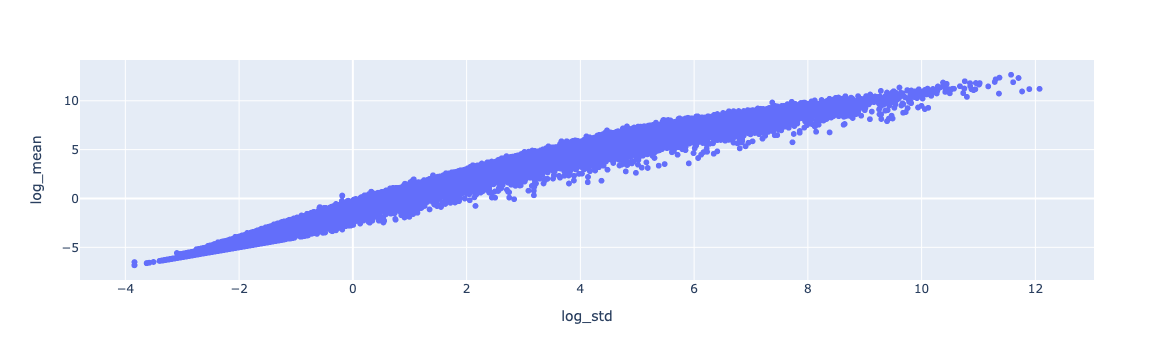

In [43]:
fig = px.scatter(gene_exp_df_metadata, y="log_mean", x="log_std")
fig.show()


## Plot the read comorbidity data

In [44]:
comorbid_df_metadata = collect_comorbid_metadata(comorbid_df)

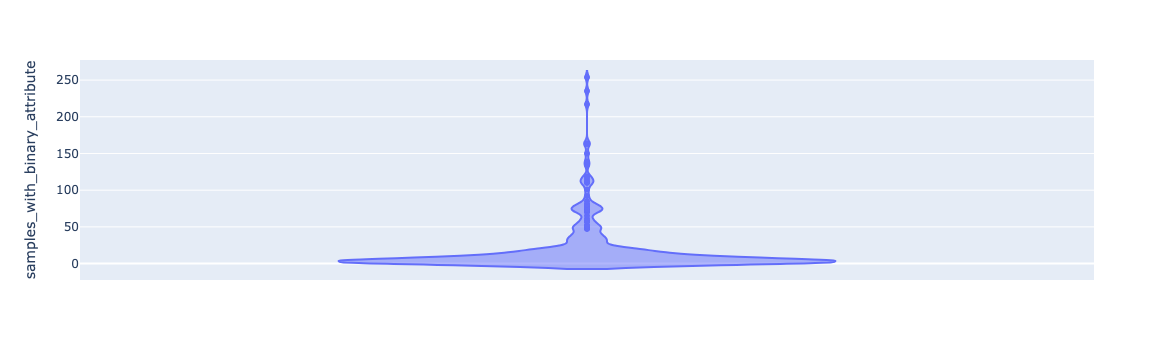

In [45]:
fig = px.violin(comorbid_df_metadata, y="samples_with_binary_attribute")
fig.show()

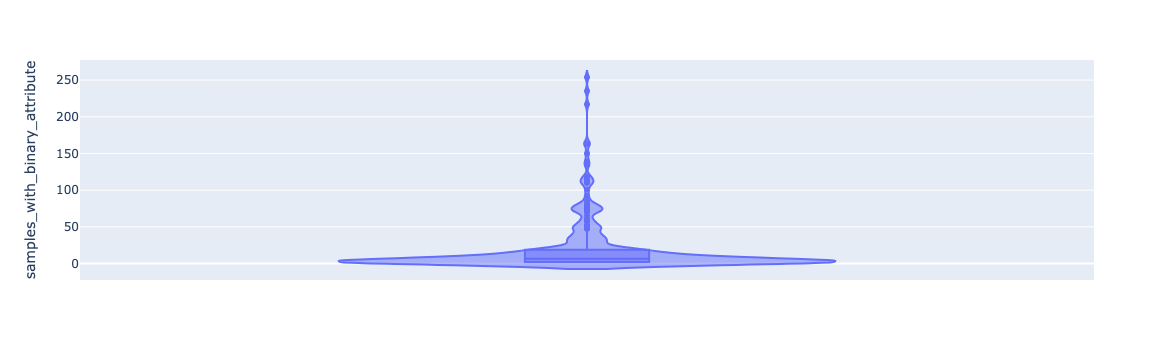

In [46]:
comorbid_df_metadata = removeallornone_bianarys(comorbid_df_metadata)
fig = px.violin(comorbid_df_metadata, y="samples_with_binary_attribute", box=True)
fig.show()

# Code that makes the simulated data

## Pick names for simulated samplesnames

In [47]:
# Select a random sample of names from namesdf
random_names = namesdf.sample(n=total_samples, replace=False)
random_names["name"] = random_names.index


### How many genes do you want to simulate

In [48]:
simulate_n_genes = 10

## First simulate the simulated values on the real values in the valuedf (gene expression based on real genes)

In [49]:
def variableexp(total_samples, mean_exp, std_exp):
  arr = np.random.normal(mean_exp, std_exp, total_samples)
  return arr

def generate_gene_exp(simulated_gene_exp_df):
  simulated_gene_exp_df["exp_array"] =  simulated_gene_exp_df.apply(lambda row: variableexp(total_samples, row["mean"], row["std"]), axis=1)
  return simulated_gene_exp_df

def simulate_values_based_on_real_genes(gene_exp_df_metadata, simulate_n_genes, total_samples):
  # Cut the data from the 'mean' column into simulate_n_genes bins with equal number of rows
  gene_exp_df_metadata['exp_group'] = pd.qcut(gene_exp_df_metadata['mean'], q=simulate_n_genes, labels=False)

  # Create an empty DataFrame to store the randomly selected rows
  simulated_gene_exp_df = pd.DataFrame()

  # Iterate through each unique group in 'exp_group'
  for group in gene_exp_df_metadata['exp_group'].unique():
    # Select rows belonging to the current group
    rows_in_group = gene_exp_df_metadata[gene_exp_df_metadata['exp_group'] == group]
    # Randomly select one row from the group
    if not rows_in_group.empty:
      random_row = rows_in_group.sample(n=1)
      # Append the randomly selected row to the DataFrame
      simulated_gene_exp_df = pd.concat([simulated_gene_exp_df, random_row])
  simulated_gene_exp_df = generate_gene_exp(simulated_gene_exp_df)
  simulated_gene_exp_df["sim_gene_name"] = "simulated_based_on_"+simulated_gene_exp_df.index
  repeat_random_names = [random_names["name"].to_list() for i in range(simulate_n_genes)]
  simulated_gene_exp_df["names"] = repeat_random_names
  simulated_gene_exp_df = simulated_gene_exp_df[["names", "exp_array", "sim_gene_name"]].copy()
  simulated_gene_exp_df_long = simulated_gene_exp_df.explode(["names", "exp_array"])
  simulated_gene_exp_df_long['exp_array'] = simulated_gene_exp_df_long['exp_array'].clip(lower=0)   
  final_simulated_value_df = simulated_gene_exp_df_long.pivot(index='names', columns='sim_gene_name', values='exp_array')
  final_simulated_value_df.index.name = None
  return final_simulated_value_df



In [73]:
simulated_value_df = simulate_values_based_on_real_genes(gene_exp_df_metadata, simulate_n_genes, total_samples)

In [74]:
simulated_value_df_Patient_column = simulated_value_df.copy()
simulated_value_df_Patient_column[samplename] = simulated_value_df.index
simulated_value_df_Patient_column = simulated_value_df_Patient_column.reset_index(drop=True)


In [75]:
simulated_value_df_Patient_column.to_csv(outdir+"simulated_gene_exp_"+date_time_string+".csv")

## Simulate the comorbids

In [53]:
def make_binary_list(total_samples, samples_true_uniform):
  binary_list = [0] * total_samples
  for _ in range(samples_true_uniform):
    random_index = random.randint(0, total_samples - 1)
    while binary_list[random_index] == 1:
      random_index = random.randint(0, total_samples - 1)
    binary_list[random_index] = 1
  return binary_list

def find_nearest_index(array, value):
    array = np.asarray(array)
    
    # Ignore NaN values
    valid_indices = ~np.isnan(array)
    filtered_array = array[valid_indices]
    
    if filtered_array.size == 0:
        raise ValueError("Input array has no valid numbers.")
    
    idx = (np.abs(filtered_array - value)).argmin()
    return np.where(valid_indices)[0][idx]

def add_bias_one_set_values(current_binary_list, simulated_value_df, genename, percent_binary_attributes_thatarevaluebias, Zscore_valuebais, Zscore_valuebais_sigma, top_or_bottom, samples_true):
  simulated_value_df = simulated_value_df.sort_values([genename])
  nameorder = simulated_value_df.index
  gene_vals = simulated_value_df[genename]
  gene_mean = simulated_value_df[genename].mean()
  gene_std = simulated_value_df[genename].std()
  gene_target_sigma = Zscore_valuebais_sigma*gene_std
  if top_or_bottom=="top":
    gene_target = gene_mean+Zscore_valuebais*gene_std
  elif top_or_bottom=="bottom":
    gene_target = gene_mean-Zscore_valuebais*gene_std
  counttries=0
  while sum(current_binary_list)<samples_true:
    random_number = np.random.normal(loc=gene_target, scale=gene_target_sigma)
    if random_number>0:
        leftover_gene_vals = [gv if current_binary_list[i] == 0 else np.nan for i, gv in enumerate(gene_vals)]
        index_nearest_to_random_number = find_nearest_index(leftover_gene_vals, random_number)
        if current_binary_list[index_nearest_to_random_number]!=1:
          current_binary_list[index_nearest_to_random_number] = 1
        else:
            counttries = counttries+1
            if counttries>10:
                gene_target_sigma = gene_target_sigma*2
                counttries=0
                print("widening sigma"+str(samples_true)+"sum_total"+str(sum(current_binary_list))+"_"+str(gene_mean)+"_"+str(gene_target_sigma)+"_"+str(percent_binary_attributes_thatarevaluebias)+"_"+str(Zscore_valuebais)+"_"+str(top_or_bottom))
                
  return current_binary_list, gene_target_sigma, nameorder


def create_simulated_n_biarary_att_from_realdata(comorbid_df_metadata, nlevels_binaryatts=12):
  nbinaryatt_min = comorbid_df_metadata["samples_with_binary_attribute"].min()
  nbinaryatt_max =comorbid_df_metadata["samples_with_binary_attribute"].max()
  nbinaryatt_med = comorbid_df_metadata["samples_with_binary_attribute"].median()
  nbinaryatt_std = comorbid_df_metadata["samples_with_binary_attribute"].std()
  simulated_n_bianary_attributes = []
  simulated_n_bianary_attributes.append(nbinaryatt_min)
  simulated_n_bianary_attributes.append(nbinaryatt_max)
  while len(simulated_n_bianary_attributes)<nlevels_binaryatts:
    random_number = int(np.random.normal(loc=nbinaryatt_med, scale=nbinaryatt_std))
    if random_number>0:
      simulated_n_bianary_attributes.append(random_number)
      simulated_n_bianary_attributes = sorted(list(set(simulated_n_bianary_attributes)))
  return simulated_n_bianary_attributes


def create_many_ba_serial(simulated_value_df, percent_binary_attributes_thatarevaluebias_list, Zscore_valuebais_list, Zscore_valuebais_sigma_list, simulated_n_bianary_attributes, biasdirs):
  df_list =[]
  genenames = [gn for gn in simulated_value_df.columns if gn!=samplename]
  for percent_binary_attributes_thatarevaluebias in percent_binary_attributes_thatarevaluebias_list:
    for Zscore_valuebais in Zscore_valuebais_list:
      for Zscore_valuebais_sigma in Zscore_valuebais_sigma_list:
        for samples_true in simulated_n_bianary_attributes:
          for top_or_bottom in biasdirs:
            for genename in genenames:
                ba_df = generate_bias_data(simulated_value_df, genename, percent_binary_attributes_thatarevaluebias, Zscore_valuebais, Zscore_valuebais_sigma, top_or_bottom, samples_true)
                df_list.append(ba_df)          
  sim_ba_df = reduce(lambda df1,df2: pd.merge(df1,df2,on=samplename), df_list)
  sim_ba_df.index=sim_ba_df[samplename]
  sim_ba_df = sim_ba_df[[cn for cn in sim_ba_df.columns if cn!=samplename]]
  return sim_ba_df

# Define the innermost logic in a separate function
def generate_bias_data(simulated_value_df, genename, percent_binary_attributes_thatarevaluebias, Zscore_valuebais, Zscore_valuebais_sigma, top_or_bottom, samples_true):
    percent_binary_attributes_not_bias = 1 - percent_binary_attributes_thatarevaluebias
    samples_true_uniform = int(round(samples_true * percent_binary_attributes_not_bias, 0))
    samples_true_bias = samples_true - samples_true_uniform
    bl = make_binary_list(total_samples, samples_true_uniform)
    bl, gene_target_sigma, nameorder = add_bias_one_set_values(bl, simulated_value_df, genename, percent_binary_attributes_thatarevaluebias, Zscore_valuebais, Zscore_valuebais_sigma, top_or_bottom, samples_true)
    bias_name = f"{genename}_Truesamplesize{samples_true}_biassamplesize{samples_true_bias}_Zscorevaluebais{Zscore_valuebais}_sigma{Zscore_valuebais_sigma}_direction_{top_or_bottom}_pba{percent_binary_attributes_thatarevaluebias}"
    ba_df = pd.DataFrame(index=nameorder)
    ba_df[bias_name] = bl
    ba_df[samplename]=nameorder
    return ba_df

def create_many_ba_parallel(simulated_value_df, percent_binary_attributes_thatarevaluebias_list, Zscore_valuebais_list, Zscore_valuebais_sigma_list, simulated_n_bianary_attributes, biasdirs):
    genenames = [gn for gn in simulated_value_df.columns if gn!=samplename]
    df_list = []
    num_processes = 64 
    with ProcessPoolExecutor(max_workers=num_processes) as executor:
        futures = []
        for percent_binary_attributes_thatarevaluebias in percent_binary_attributes_thatarevaluebias_list:
            for Zscore_valuebais in Zscore_valuebais_list:
                for Zscore_valuebais_sigma in Zscore_valuebais_sigma_list:
                    for samples_true in simulated_n_bianary_attributes:
                        for top_or_bottom in biasdirs:
                            for genename in genenames:
                                futures.append(
                                    executor.submit(generate_bias_data, simulated_value_df, genename, percent_binary_attributes_thatarevaluebias, Zscore_valuebais, Zscore_valuebais_sigma, top_or_bottom, samples_true)
                                )

        # Collect results
        for future in futures:
            ba_df = future.result()
            df_list.append(ba_df)
    sim_ba_df = reduce(lambda df1,df2: pd.merge(df1,df2,on=samplename), df_list)
    sim_ba_df.index=sim_ba_df[samplename]
    sim_ba_df = sim_ba_df[[cn for cn in sim_ba_df.columns if cn!=samplename]]
    return sim_ba_df

def create_many_ba(simulated_value_df, percent_binary_attributes_thatarevaluebias_list, Zscore_valuebais_list, Zscore_valuebais_sigma_list, simulated_n_bianary_attributes, biasdirs):
    if parallel==True:
        sim_ba_df = create_many_ba_parallel(simulated_value_df, percent_binary_attributes_thatarevaluebias_list, Zscore_valuebais_list, Zscore_valuebais_sigma_list, simulated_n_bianary_attributes, biasdirs)
    else:
        sim_ba_df = create_many_ba_serial(simulated_value_df, percent_binary_attributes_thatarevaluebias_list, Zscore_valuebais_list, Zscore_valuebais_sigma_list, simulated_n_bianary_attributes, biasdirs)
    return sim_ba_df


In [54]:
 simulated_value_df[[gn for gn in simulated_value_df.columns]].mean()

sim_gene_name
simulated_based_on_ENSG00000132793.11      16.435063
simulated_based_on_ENSG00000135114.12    2283.720696
simulated_based_on_ENSG00000175267.14       6.706088
simulated_based_on_ENSG00000176923.5        0.075326
simulated_based_on_ENSG00000178234.12     688.143181
simulated_based_on_ENSG00000214922.9      106.231172
simulated_based_on_ENSG00000222220.1        0.034686
simulated_based_on_ENSG00000231969.1        1.283532
simulated_based_on_ENSG00000234632.1        0.137387
simulated_based_on_ENSG00000236526.1        0.800068
dtype: object

In [56]:
def violin_bianary(thisdf, comorbid, gene):
  fig = px.violin(thisdf, y=gene, x=comorbid, box=True, points="all")
  fig.show()



In [57]:
#violin_bianary(merge_df, bias_name, genename)

How many samples do you want to have the binary attribute? simulated_n_bianary_attributes = [20,40] means that the program will create some binary attributes that are true in 20 samples and some true in 40 samples.


In [58]:
#simulated_n_bianary_attributes = [20,40]
# I base my simulated_n_bianary_attributes on the real distrubution of the number of people with the comorbiditys
simulated_n_bianary_attributes = create_simulated_n_biarary_att_from_realdata(comorbid_df_metadata, nlevels_binaryatts=10)
simulated_n_bianary_attributes

[1, 13, 18, 28, 29, 33, 48, 62, 72, 254]

Do you want to simulate that the samples that are enriched for the biarary attribute have higher values (biasdirs=["bottom"]) or lower values (biasdirs=["top"]) or both (biasdirs=["top", "bottom"]) in the value data frame.

In [59]:
biasdirs=["top", "bottom"]
#biasdirs=["bottom"]
#biasdirs=["top"]

At what Zscore for the gene should the bias be at? What zscore-sigma should the bias have? Zscore_valuebais_list=[1,1.5,2,2.5] means the program will crease some biarary attributes that are bias at a zscore of 1 and some at a zcore of 1.5 relative to the mean and std of the value.

In [60]:
Zscore_valuebais_list=[1,1.5,2,2.5,3]
#Zscore_valuebais_list=[2.5]

Zscore_valuebais_sigma_list=[0.5]


What percent of true samples do you want to be bais?

In [63]:
percent_binary_attributes_thatarevaluebias_list=range(0,101, 10)
percent_binary_attributes_thatarevaluebias_list=[i/100 for i in percent_binary_attributes_thatarevaluebias_list]
percent_binary_attributes_thatarevaluebias_list

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [64]:
simulated_ba_df = create_many_ba(simulated_value_df, percent_binary_attributes_thatarevaluebias_list, Zscore_valuebais_list, Zscore_valuebais_sigma_list, simulated_n_bianary_attributes, biasdirs)
simulated_ba_df

simulated_based_on_ENSG00000132793.11_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0  \
Participant                                                                                                                         
Bethany                                                      0                                                                      
Laraine                                                      0                                                                      
Lauraine                                                     0                                                                      
Risa                                                         0                                                                      
Mabel                                                        0                                                                      
...                                                        ...                                                                      
Dyana                                                        0                                                                      
Costanza                                                     0                                                                      
Evanne                                                       0                                                                      
Ronni                                                        0                                                                      
Pierrette                                                    0                                                                      

             simulated_based_on_ENSG00000135114.12_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0  \
Participant                                                                                                                         
Bethany                                                      0                                                                      
Laraine                                                      0                                                                      
Lauraine                                                     0                                                                      
Risa                                                         0                                                                      
Mabel                                                        0                                                                      
...                                                        ...                                                                      
Dyana                                                        0                                                                      
Costanza                                                     0                                                                      
Evanne                                                       0                                                                      
Ronni                                                        0                                                                      
Pierrette                                                    0                                                                      

             simulated_based_on_ENSG00000175267.14_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0  \
Participant                                                                                                                         
Bethany                                                      0                                                                      
Laraine                                                      0                                                                      
Lauraine             

In [70]:
simulated_ba_df_Patient_column = simulated_ba_df.copy()
simulated_ba_df_Patient_column[samplename] = simulated_ba_df_Patient_column.index
simulated_ba_df_Patient_column = simulated_ba_df_Patient_column.reset_index(drop=True)


# Save output

In [71]:
simulated_ba_df_Patient_column.to_csv(outdir+"simulated_binary_attribute_"+date_time_string+".csv")

In [76]:
def savemetadata():
  gene_exp_df_metadata.to_csv(outdir+"gene_exp_metadata_"+date_time_string+".csv")
  comorbid_df_metadata.to_csv(outdir+"comorbid_metadata_"+date_time_string+".csv")

def savesettings(date_time_string, samplename, simulate_n_genes, simulated_n_bianary_attributes, Zscore_valuebais_list, Zscore_valuebais_sigma_list, percent_binary_attributes_thatarevaluebias_list, biasdirs):
  wf = open(outdir+"run_info_"+date_time_string+".txt", "w")
  strings_to_save = [date_time_string, samplename]
  lists_to_save = [simulate_n_genes, simulated_n_bianary_attributes, Zscore_valuebais_list, Zscore_valuebais_sigma_list, percent_binary_attributes_thatarevaluebias_list, biasdirs]
  for string_to_save in strings_to_save:
    wf.write(string_to_save+"\n")
  for list_to_save in lists_to_save:
    wf.write(str(list_to_save)+"\n")
  wf.close()

In [77]:
savesettings(date_time_string, samplename, simulate_n_genes, simulated_n_bianary_attributes, Zscore_valuebais_list, Zscore_valuebais_sigma_list, percent_binary_attributes_thatarevaluebias_list, biasdirs)


# Check the simulated data files

In [78]:
#20241014173816

In [79]:
url_counts="/Users/allenma/temp/simulated_gene_exp_20241014173816.csv"

In [46]:
url = "/Users/allenma/temp/simulated_binary_attribute_20241014173816.csv"

In [47]:
comorbid_df = pd.read_csv(url, index_col=0)
gene_exp_df=pd.read_csv(url_counts, index_col=0)



In [48]:
def make_gene_and_comorbid_df(acomorbid, agene):
  onegenedf = gene_exp_df[[agene, "Patient"]]
  onecomborbiddf = comorbid_df[[acomorbid, "Patient"]]
  merge_df = onegenedf.merge(onecomborbiddf, on="Patient")
  print ("There are ", merge_df[acomorbid].sum(), "people with ",comorbid)
  print ("The mean expression of gene ",agene, " is ", merge_df[agene].mean())
  return merge_df

In [49]:
gene_exp_df.columns

Index(['simulated_based_on_ENSG00000156265',
       'simulated_based_on_ENSG00000156273',
       'simulated_based_on_ENSG00000170262',
       'simulated_based_on_ENSG00000223692',
       'simulated_based_on_ENSG00000237569',
       'simulated_based_on_ENSG00000240755',
       'simulated_based_on_ENSG00000264002',
       'simulated_based_on_ENSG00000269950',
       'simulated_based_on_ENSG00000277282',
       'simulated_based_on_ENSG00000279648', 'Patient'],
      dtype='object')

In [50]:
comorbid_df.columns

Index(['simulated_based_on_ENSG00000156265_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000156273_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000170262_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000223692_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000237569_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000240755_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000264002_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       'simulated_based_on_ENSG00000269950_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0',
       '

In [53]:
gene="simulated_based_on_ENSG00000264002"
comorbid=gene+"_Truesamplesize141_biassamplesize113_Zscorevaluebais3_sigma0.5_direction_top_pba0.8"


In [54]:
thisdf = make_gene_and_comorbid_df(comorbid, gene)

There are  141 people with  simulated_based_on_ENSG00000264002_Truesamplesize141_biassamplesize113_Zscorevaluebais3_sigma0.5_direction_top_pba0.8
The mean expression of gene  simulated_based_on_ENSG00000264002  is  0.039086292184426066


In [55]:
def violin_bianary(thisdf, comorbid, gene):
  fig = px.violin(thisdf, y=gene, x=comorbid, box=True, points="all")
  fig.show()


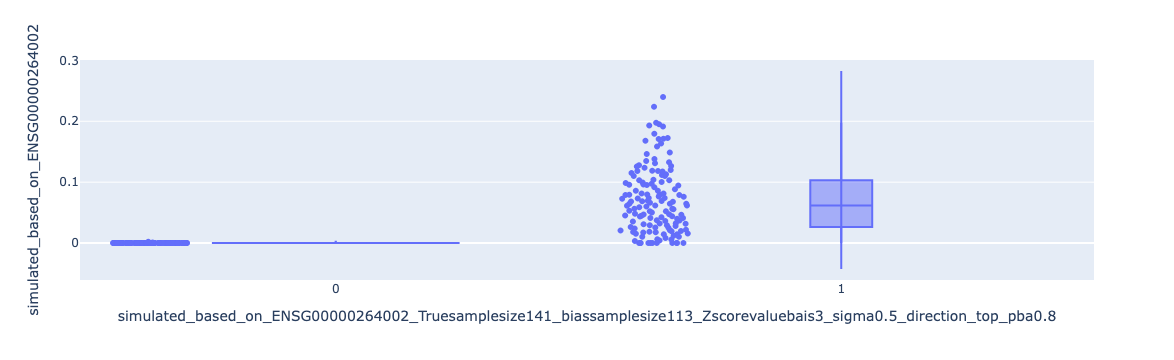

In [56]:
violin_bianary(thisdf, comorbid, gene)